In [22]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [1]:
# importamos paquetes
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from collections import OrderedDict

import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

import helper

In [2]:
# especificamos que el tensor x es seguido por autograd 
x = torch.randn(4, requires_grad=True)
print(x)

tensor([ 0.6419, -0.8689, -1.5630,  0.3685], requires_grad=True)


In [3]:
# generamos un nuevo tensor a partir de x
# por ejemplo elevemos al cuadrado la variable x
y = x**2
print(y)

tensor([0.4120, 0.7549, 2.4431, 0.1358], grad_fn=<PowBackward0>)


In [4]:
## con grad_fn observamos la operación que generó y, es decir una operación potencia (pow)
print(y.grad_fn)

In [5]:
# De esta forma es posible saber las operaciónes que generan cada tensor, y por tanto, es posible calcular el gradiente.
# Hagamos ahora una operación de media
z = y.mean()
print(z)

tensor(0.9364, grad_fn=<MeanBackward0>)


In [6]:
# hasta este momento los gradientes son cero
print(x.grad)

None


In [7]:
z.backward()
print(x.grad)

print(x/2)

tensor([ 0.3209, -0.4344, -0.7815,  0.1842])
tensor([ 0.3209, -0.4344, -0.7815,  0.1842], grad_fn=<DivBackward0>)


In [9]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                transforms.Normalize([0.5],[0.5])
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 77431120.99it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 65906253.44it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 21608919.28it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6872485.13it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [10]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[1], output_size))]))

# NOTA solo calcularemos los logits y definiremos la perdida a partir de ellos

In [11]:
# TODO: Define la pérdida 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [12]:
print('Initial weights - ', model.fc1.weight)

Initial weights -  Parameter containing:
tensor([[-0.0132,  0.0147, -0.0255,  ..., -0.0067,  0.0125,  0.0148],
        [ 0.0005, -0.0352,  0.0316,  ..., -0.0075, -0.0126,  0.0038],
        [ 0.0006, -0.0119, -0.0212,  ...,  0.0109, -0.0189,  0.0184],
        ...,
        [ 0.0159, -0.0191, -0.0287,  ...,  0.0263,  0.0352, -0.0284],
        [ 0.0128, -0.0097,  0.0113,  ...,  0.0271,  0.0200, -0.0287],
        [-0.0177, -0.0327, -0.0059,  ...,  0.0221,  0.0342,  0.0182]],
       requires_grad=True)


In [13]:
images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Limpiar los gradientes por que se acumulan
optimizer.zero_grad()

# Pase hacia adelante
output = model.forward(images)
# Perdida
loss = criterion(output, labels)
# Pase de reversa
loss.backward()
print('Gradient -', model.fc1.weight.grad)
# Actualiza los pesos de acuerdo a un paso del optimizador
optimizer.step()

Gradient - tensor([[ 1.7451e-03,  1.7451e-03,  1.7451e-03,  ...,  1.7451e-03,
          1.7451e-03,  1.7451e-03],
        [ 4.9525e-04,  4.9525e-04,  4.9525e-04,  ...,  4.9525e-04,
          4.9525e-04,  4.9525e-04],
        [ 3.5110e-03,  3.5110e-03,  3.5110e-03,  ...,  3.5110e-03,
          3.5110e-03,  3.5110e-03],
        ...,
        [-1.3341e-03, -1.3341e-03, -1.3341e-03,  ..., -1.3341e-03,
         -1.3341e-03, -1.3341e-03],
        [ 4.7164e-06,  4.7164e-06,  4.7164e-06,  ...,  4.7164e-06,
          4.7164e-06,  4.7164e-06],
        [-2.6915e-03, -2.6915e-03, -2.6915e-03,  ..., -2.6915e-03,
         -2.6915e-03, -2.6915e-03]])


In [14]:
print('Updated weights - ', model.fc1.weight)

Updated weights -  Parameter containing:
tensor([[-0.0132,  0.0147, -0.0255,  ..., -0.0067,  0.0125,  0.0148],
        [ 0.0005, -0.0352,  0.0316,  ..., -0.0075, -0.0126,  0.0038],
        [ 0.0006, -0.0119, -0.0212,  ...,  0.0109, -0.0189,  0.0183],
        ...,
        [ 0.0159, -0.0191, -0.0287,  ...,  0.0264,  0.0352, -0.0283],
        [ 0.0128, -0.0097,  0.0113,  ...,  0.0271,  0.0200, -0.0287],
        [-0.0177, -0.0327, -0.0058,  ...,  0.0222,  0.0342,  0.0182]],
       requires_grad=True)


In [29]:
# hiperparámetros
# número de épocas
epochs = 10
tasa_de_aprendizaje = 0.005#0.003

# TODO: redefine la configuración del optimizador usando la tasa de aprendizaje objetivo
optimizer = optim.SGD(model.parameters(), lr=tasa_de_aprendizaje)

In [30]:
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    # en cada iteración del for cargamos un batch
    for images, labels in iter(trainloader):
        steps += 1
        # Aplanar las imagenes de MNIST
        images.resize_(images.size()[0], 784)
        
        # Reiniciar el gradiente
        optimizer.zero_grad()
        
        # TODO: Pase frontal de la red
        output = model.forward(images)
        
        # TODO: Estimar la perdida
        loss = criterion(output, labels)
        
        # TODO: Backprogation
        loss.backward()
        
        # TODO: Actualizamos los pesos
        optimizer.step()
        
        # Guardamos la perdida para control del entrenamiento
        running_loss += loss.item()
        
        # imprimimos cada 40 lotes
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/10...  Loss: 0.2560
Epoch: 1/10...  Loss: 0.2254
Epoch: 1/10...  Loss: 0.2608
Epoch: 1/10...  Loss: 0.2349
Epoch: 1/10...  Loss: 0.2696
Epoch: 1/10...  Loss: 0.2602
Epoch: 1/10...  Loss: 0.2237
Epoch: 1/10...  Loss: 0.2466
Epoch: 1/10...  Loss: 0.2121
Epoch: 1/10...  Loss: 0.2488
Epoch: 1/10...  Loss: 0.2433
Epoch: 1/10...  Loss: 0.2373
Epoch: 1/10...  Loss: 0.2374
Epoch: 1/10...  Loss: 0.2308
Epoch: 1/10...  Loss: 0.2461
Epoch: 1/10...  Loss: 0.2439
Epoch: 1/10...  Loss: 0.2453
Epoch: 1/10...  Loss: 0.2534
Epoch: 1/10...  Loss: 0.2359
Epoch: 1/10...  Loss: 0.2126
Epoch: 1/10...  Loss: 0.2067
Epoch: 1/10...  Loss: 0.2087
Epoch: 1/10...  Loss: 0.2213
Epoch: 2/10...  Loss: 0.1299
Epoch: 2/10...  Loss: 0.2420
Epoch: 2/10...  Loss: 0.2116
Epoch: 2/10...  Loss: 0.2272
Epoch: 2/10...  Loss: 0.2376
Epoch: 2/10...  Loss: 0.2366
Epoch: 2/10...  Loss: 0.2259
Epoch: 2/10...  Loss: 0.2012
Epoch: 2/10...  Loss: 0.2063
Epoch: 2/10...  Loss: 0.2430
Epoch: 2/10...  Loss: 0.2366
Epoch: 2/10...

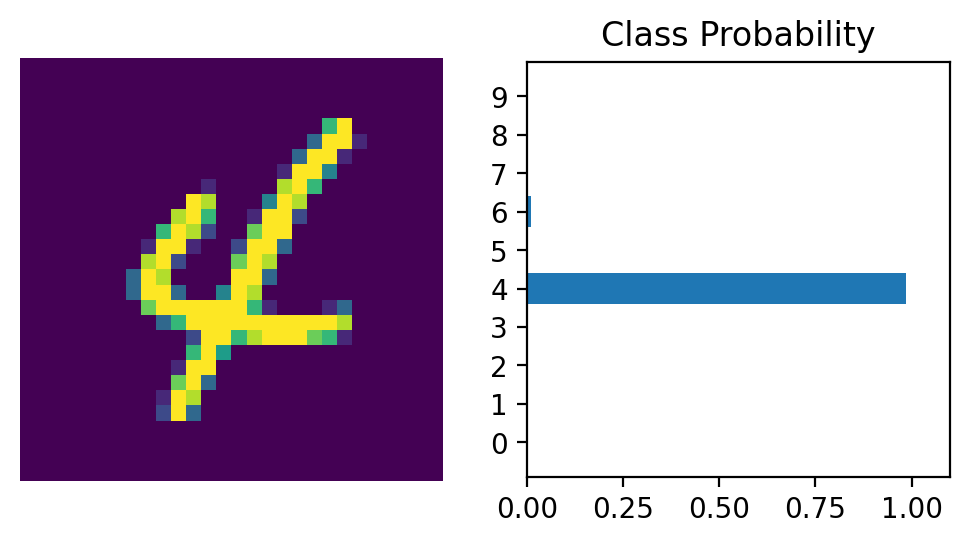

In [35]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), ps)